<h1 style="font-weight:bold;font-family:sans-serif;text-align:center;">Assignment 06</h1>

#### Name:- Sk Fardeen Hossain

#### Roll No. :- 2021CSB023

#### G-Suite Id:- 2021csb023.sk@students.iiests.ac.in

#### Department:- Computer Science and Technology

## **Question 01**

Download and preprocess the sentiment analysis dataset from

https://www.kaggle.com/snap/amazon-fine-food-reviews. Download the Glove

word vectors from https://nlp.standford.edu/data/glove.6B.zip and extract the 100-

dimensional file (glove.6B.100d.txt) from the zipped folder.

In [3]:
import kagglehub



# Download latest version

path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")



print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [4]:
import pandas as pd

import numpy as np



df = pd.read_csv(path+'/Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
## Download the GLOVE vector embeddings



!wget "https://nlp.stanford.edu/data/glove.6B.zip"

--2024-11-07 13:46:55--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-07 13:46:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

glove.6B.zip        100%[===================>] 822.24M  5.09MB/s    in 2m 39s  

2024-11-07 13:49:35 (5.17 MB/s) - 'glove.6B.zip' saved [862182613/862182613]



In [6]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [7]:
!rm glove.6B.zip

!rm glove.6B.50d.txt

!rm glove.6B.200d.txt

!rm glove.6B.300d.txt

In [8]:
# Map each word to its embedding



EM_DIM = 100



EM_MAP = dict()



with open('glove.6B.100d.txt', 'r') as fp:

    for line in fp.readlines():

        tokens = line.split()

        word = tokens[0]

        vec = np.array(tokens[1:], dtype=np.float32)

        EM_MAP[word] = vec

In [9]:
word = 'god'

print("Word is :-",word)



print("Embedding is :- ", EM_MAP.get(word))

Word is :- god
Embedding is :-  [ 0.43414   0.83408   0.5934   -0.27576   0.0738    1.1678   -0.81431
 -0.44566   0.107    -0.64585   0.082188 -0.21979   0.74463   0.52581
  0.30714  -1.3932    0.22689   0.87584  -1.5773    1.325    -0.17464
 -1.0626   -1.0502   -0.20297   0.57481   1.1517   -0.64222  -0.11813
  0.52094   0.10227   0.63393   0.05253  -0.24155   0.11705  -0.16385
 -0.08113  -0.40486   0.27208   0.62358  -0.78284  -0.78031   1.1003
  0.59216  -0.48685  -0.20998  -0.47734   0.03295   0.11653  -0.39919
 -0.76189   0.09318   0.84754   1.5402    1.0642   -0.62729  -1.8783
  0.67105   0.31923   0.74992   0.20445   0.76704   0.4952   -0.29807
 -0.75948   0.3302    0.44451   0.054353 -0.21146  -0.099696 -0.64717
  0.70308   0.19498   0.59476  -0.54367   0.3663    0.08349   0.090207
 -0.54985  -0.59734   0.24354  -0.36756   0.29299  -0.93052   0.103
 -1.1354    0.37565  -0.30992  -0.65516   0.82278  -0.17073  -0.049053
 -0.59641   0.35431   0.5645   -0.39342  -1.1199   -0.52763 

## **Question 02**

Preprocess the review dataset by considering the column “review score” > 3 as

positive reviews and others as negative reviews. For training on local machine

considers 5000 positive and negative reviews each for the training dataset.

Consider 2000 reviews for the rest dataset and validation dataset each. Strip the

length of each review sentence (number of words) according to your computation

availability.

In [10]:
## Create a new col_name 'verdict' in the df

## verdict is positive if review_score > 3 else negative

df['verdict'] = ['positive' if score>3 else 'negative' for score in df['Score']]



df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,verdict
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'verdict'],
      dtype='object')

In [12]:
df = df.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time'],axis=1)



df.head()

,Summary,Text,verdict
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,Great taffy,Great taffy at a great price. There was a wid...,positive


In [13]:
df['Statement']=[str(x)+str('. ')+str(y) for x,y in zip(df['Summary'],df['Text'])]



df.head()

,Summary,Text,verdict,Statement
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,Good Quality Dog Food. I have bought several o...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,Not as Advertised. Product arrived labeled as ...
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive,"""Delight"" says it all. This is a confection th..."
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,Cough Medicine. If you are looking for the sec...
4,Great taffy,Great taffy at a great price. There was a wid...,positive,Great taffy. Great taffy at a great price. Th...


In [14]:
df = df.drop(columns=['Text','Summary'],axis=1)



df.head()

,verdict,Statement
0,positive,Good Quality Dog Food. I have bought several o...
1,negative,Not as Advertised. Product arrived labeled as ...
2,positive,"""Delight"" says it all. This is a confection th..."
3,negative,Cough Medicine. If you are looking for the sec...
4,positive,Great taffy. Great taffy at a great price. Th...


In [15]:
df['Statement']=[str(x).lower() for x in df['Statement']] # Since embeddings are done on lower-case letters



df.head()

,verdict,Statement
0,positive,good quality dog food. i have bought several o...
1,negative,not as advertised. product arrived labeled as ...
2,positive,"""delight"" says it all. this is a confection th..."
3,negative,cough medicine. if you are looking for the sec...
4,positive,great taffy. great taffy at a great price. th...


In [16]:
df.shape

(568454, 2)

In [17]:
X = df['Statement']



y = df['verdict']



from sklearn.model_selection import train_test_split



X_train, X_rem, y_train,y_rem = train_test_split(X, y, test_size = 0.2, random_state = 4)

X_val, X_test, y_val,y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 4)



print(X_train.shape)

print(X_val.shape)

print(X_test.shape)

(454763,)
(56845,)
(56846,)


In [18]:
## Reduce size



X_train = X_train[:80000]

X_val = X_val[:10000]

X_test = X_test[:10000]



y_train=y_train[:80000]

y_val=y_val[:10000]

y_test=y_test[:10000]

## **Question 03**

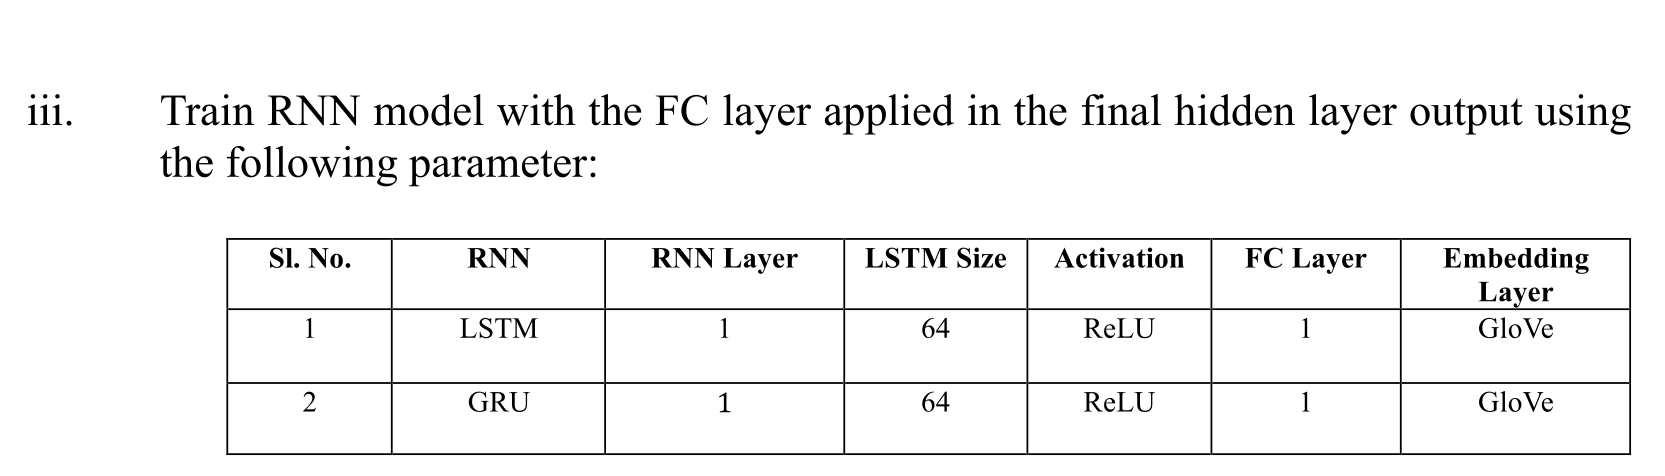

In [19]:
## At first we need to create an embedding layer

# First step will be tokenization



from tensorflow.keras.preprocessing.text import Tokenizer



MAX_WORDS = 10000  # Adjust as needed

tokenizer = Tokenizer(num_words=MAX_WORDS)

tokenizer.fit_on_texts(X_train)



X_train_sequences = tokenizer.texts_to_sequences(X_train)

X_val_sequences = tokenizer.texts_to_sequences(X_val)

X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences



MAX_LENGTH = 300 # Average review length

X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_LENGTH)

X_val_padded = pad_sequences(X_val_sequences, maxlen=MAX_LENGTH)

X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_LENGTH)

In [21]:
## Convert verdict into one hot encoded form



from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_val_encoded = label_encoder.transform(y_val)

y_test_encoded = label_encoder.transform(y_test)



y_train_onehot = to_categorical(y_train_encoded)

y_val_onehot = to_categorical(y_val_encoded)

y_test_onehot = to_categorical(y_test_encoded)

In [22]:
# Create embedding matrix



embedding_matrix = np.zeros((MAX_WORDS, EM_DIM))

for word, i in tokenizer.word_index.items():

    if i < MAX_WORDS:

        embedding_vector = EM_MAP.get(word)

        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector

In [23]:
# Create embedding layer

from tensorflow.keras.layers import Embedding



embedding_layer = Embedding(MAX_WORDS,

                            EM_DIM,

                            weights=[embedding_matrix],

                            input_length=MAX_LENGTH,

                            trainable=False)

In [24]:
# Import libraries



from tensorflow.keras import Sequential

from tensorflow.keras.layers import LSTM,GRU,Dense, Dropout

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
## Define the RNN(LSTM) model



model = Sequential()

model.add(embedding_layer)

model.add(LSTM(64,activation='relu'))

# model.add(Dense(16,activation='relu'))

model.add(Dense(2,activation='softmax'))



model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (64, 300, 100)              │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])



history = model.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 41ms/step - accuracy: 0.7453 - loss: 15697380.0000 - val_accuracy: 0.7802 - val_loss: 0.5083
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7781 - loss: 0.5087 - val_accuracy: 0.7802 - val_loss: 0.5013
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.7808 - loss: 0.4991 - val_accuracy: 0.7807 - val_loss: 0.4964
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7782 - loss: 0.4983 - val_accuracy: 0.7805 - val_loss: 0.4938
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7826 - loss: 0.4917 - val_accuracy: 0.7807 - val_loss: 0.4916
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.7814 - loss: 0.4906 - val_accuracy: 0.7804 - val_loss: 0.4904
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7831 - loss: 0.4874 - val_accuracy: 0.7807 - val_loss: 0.4896
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 44ms/step - accuracy: 0

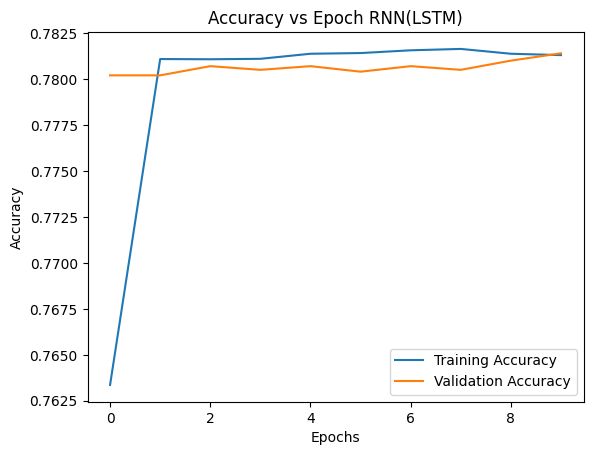

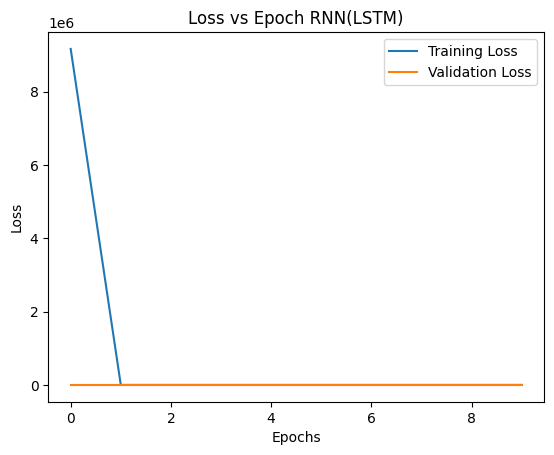

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(LSTM)')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(LSTM)')

plt.legend()

plt.show()

In [ ]:
## Define the RNN(GRU) model



model = Sequential()

model.add(embedding_layer)

model.add(GRU(64,activation='relu'))

# model.add(Dense(16,activation='relu'))

model.add(Dense(2,activation='softmax'))



model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (64, 300, 100)              │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])



history = model.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 53ms/step - accuracy: 0.9059 - loss: 0.2259 - val_accuracy: 0.9088 - val_loss: 0.2262
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.9145 - loss: 0.2106 - val_accuracy: 0.9095 - val_loss: 0.2204
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9184 - loss: 0.1996 - val_accuracy: 0.9188 - val_loss: 0.2026
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9217 - loss: 0.1912 - val_accuracy: 0.9213 - val_loss: 0.1961
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.9264 - loss: 0.1837 - val_accuracy: 0.9214 - val_loss: 0.2006
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.9309 - loss: 0.1725 - val_accuracy: 0.9148 - val_loss: 0.2186
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9339 - loss: 0.1677 - val_accuracy: 0.9248 - val_loss: 0.1910
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9361 -

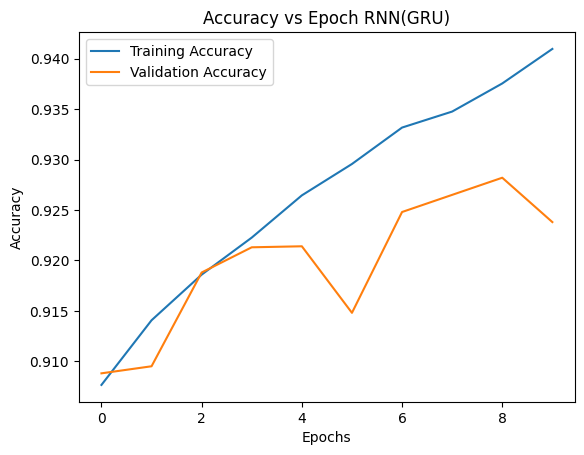

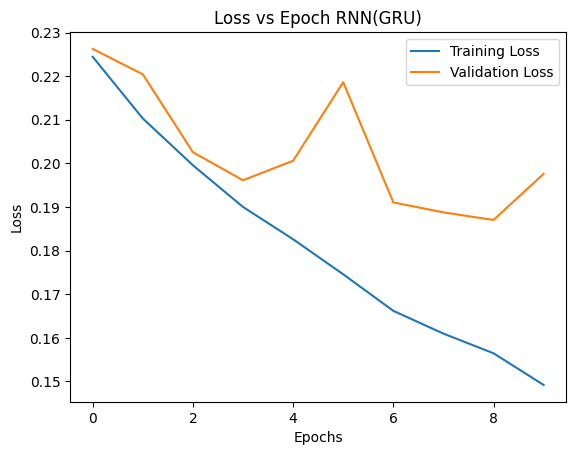

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(GRU)')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(GRU)')

plt.legend()

plt.show()

Clearly GRU performs better than LSTM

## **Question 04**

For the best model above, vary the size of RNN: [32, 128]

In [ ]:
model1 = Sequential()

model1.add(embedding_layer)

model1.add(GRU(32,activation='relu'))

# model1.add(Dense(16,activation='relu'))

model1.add(Dense(2,activation='softmax'))



model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (64, 300, 100)              │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
model2 = Sequential()

model2.add(embedding_layer)

model2.add(GRU(128,activation='relu'))

# model2.add(Dense(16,activation='relu'))

model2.add(Dense(2,activation='softmax'))



model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (64, 300, 100)              │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 50ms/step - accuracy: 0.7917 - loss: 0.4748 - val_accuracy: 0.8862 - val_loss: 0.2722
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.8904 - loss: 0.2634 - val_accuracy: 0.9012 - val_loss: 0.2398
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 54ms/step - accuracy: 0.8985 - loss: 0.2429 - val_accuracy: 0.9075 - val_loss: 0.2264
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.9062 - loss: 0.2255 - val_accuracy: 0.9102 - val_loss: 0.2184
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9108 - loss: 0.2163 - val_accuracy: 0.9042 - val_loss: 0.2317
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.9130 - loss: 0.2129 - val_accuracy: 0.9130 - val_loss: 0.2150
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9143 - loss: 0.2088 - val_accuracy: 0.9178 - val_loss: 0.2039
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9188 -

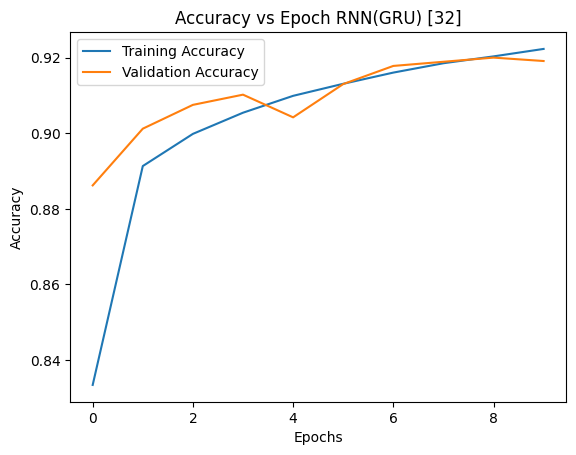

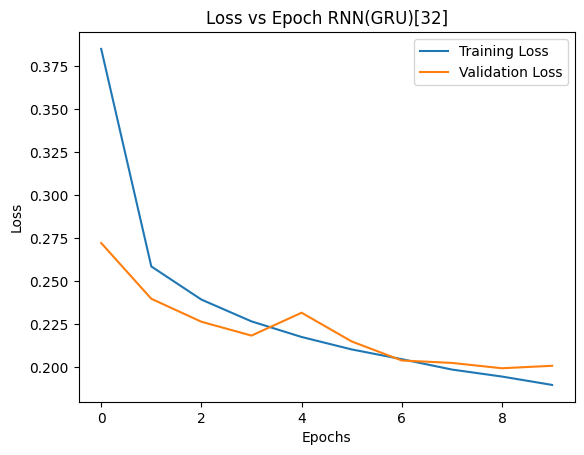

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])



history = model1.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model1.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')



plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(GRU) [32]')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(GRU)[32]')

plt.legend()

plt.show()

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 54ms/step - accuracy: 0.7904 - loss: 0.4736 - val_accuracy: 0.8979 - val_loss: 0.2518
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.8975 - loss: 0.2494 - val_accuracy: 0.9098 - val_loss: 0.2209
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9109 - loss: 0.2183 - val_accuracy: 0.9156 - val_loss: 0.2076
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9199 - loss: 0.1979 - val_accuracy: 0.9205 - val_loss: 0.1962
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.9237 - loss: 0.1861 - val_accuracy: 0.9240 - val_loss: 0.1923
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9282 - loss: 0.1758 - val_accuracy: 0.9283 - val_loss: 0.1876
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9364 - loss: 0.1606 - val_accuracy: 0.9281 - val_loss: 0.1829
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9400 -

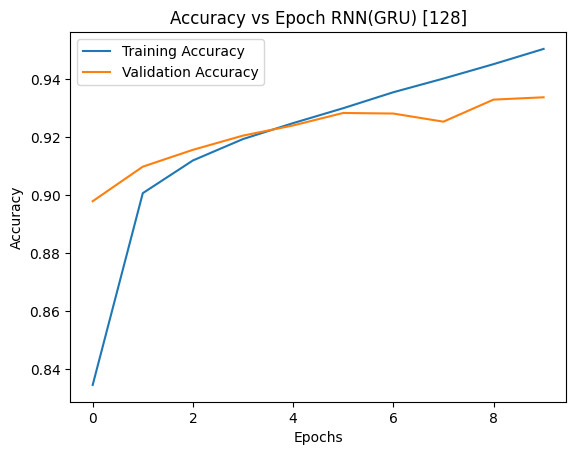

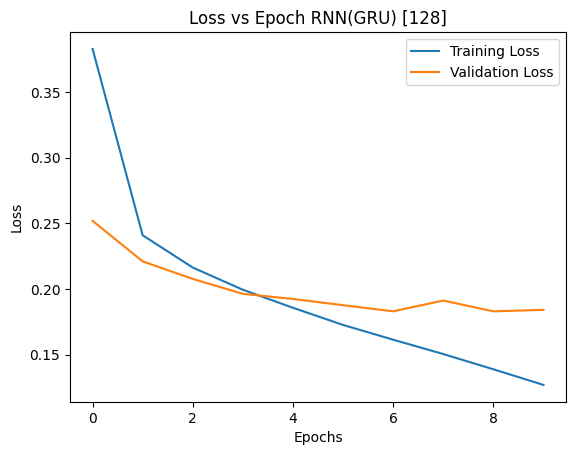

In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])



history = model2.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model2.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')



plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(GRU) [128]')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(GRU) [128]')

plt.legend()

plt.show()

128 units GRU RNN is better than 32 units GRU

In [40]:
best_unit=128

## **Question 05**

For the best model above, vary the number of stack layers of RNN: [2, 3, 4]. One is

done previously.

In [41]:
model1 = Sequential()

model1.add(embedding_layer)

model1.add(GRU(best_unit,activation='relu',return_sequences=True))

model1.add(GRU(best_unit,activation='relu'))

model1.add(Dense(2,activation='softmax'))



model1.summary()



model2 = Sequential()

model2.add(embedding_layer)

model2.add(GRU(best_unit,activation='relu',return_sequences=True))

model2.add(GRU(best_unit,activation='relu',return_sequences=True))

model2.add(GRU(best_unit,activation='relu'))

model2.add(Dense(2,activation='softmax'))



model2.summary()



model3 = Sequential()

model3.add(embedding_layer)

model3.add(GRU(best_unit,activation='relu',return_sequences=True))

model3.add(GRU(best_unit,activation='relu',return_sequences=True))

model3.add(GRU(best_unit,activation='relu',return_sequences=True))

model3.add(GRU(best_unit,activation='relu'))

model3.add(Dense(2,activation='softmax'))



model3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_45 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_46 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_47 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_48 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_49 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_50 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_51 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_52 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_53 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.8091 - loss: 0.4238 - val_accuracy: 0.9063 - val_loss: 0.2353
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9030 - loss: 0.2336 - val_accuracy: 0.9064 - val_loss: 0.2267
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9136 - loss: 0.2093 - val_accuracy: 0.9199 - val_loss: 0.2016
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9236 - loss: 0.1898 - val_accuracy: 0.9269 - val_loss: 0.1897
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9296 - loss: 0.1765 - val_accuracy: 0.9236 - val_loss: 0.1884
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9364 - loss: 0.1595 - val_accuracy: 0.9313 - val_loss: 0.1834
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9413 - loss: 0.1477 - val_accuracy: 0.9275 - val_loss: 0.1845
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9465 -

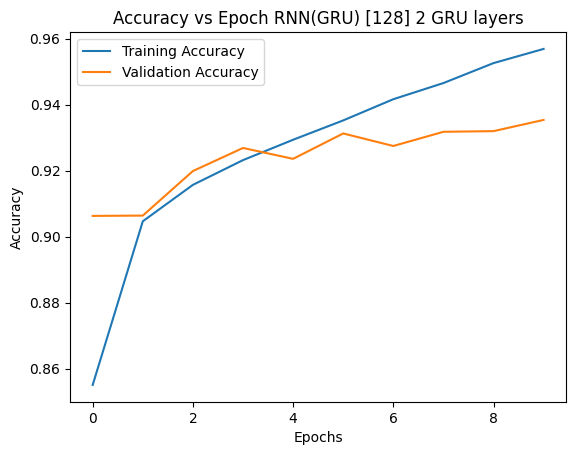

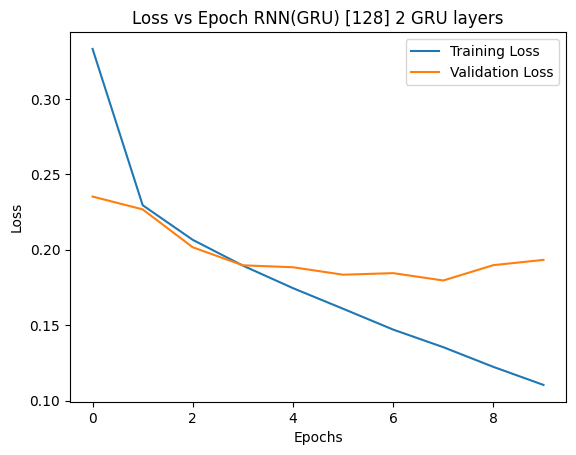

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 133s 102ms/step - accuracy: 0.8214 - loss: 0.4132 - val_accuracy: 0.9043 - val_loss: 0.2342
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 102ms/step - accuracy: 0.9064 - loss: 0.2294 - val_accuracy: 0.9190 - val_loss: 0.2084
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 127s 102ms/step - accuracy: 0.9194 - loss: 0.1982 - val_accuracy: 0.9228 - val_loss: 0.1940
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 101ms/step - accuracy: 0.9270 - loss: 0.1803 - val_accuracy: 0.9269 - val_loss: 0.1852
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 101ms/step - accuracy: 0.9343 - loss: 0.1658 - val_accuracy: 0.9290 - val_loss: 0.1779
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 101ms/step - accuracy: 0.9396 - loss: 0.1511 - val_accuracy: 0.9297 - val_loss: 0.1777
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 101ms/step - accuracy: 0.9432 - loss: 0.1424 - val_accuracy: 0.9339 - val_loss: 0.1768
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 101ms/step - ac

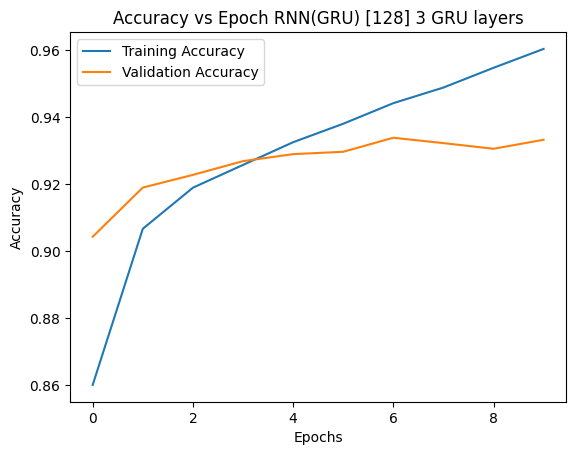

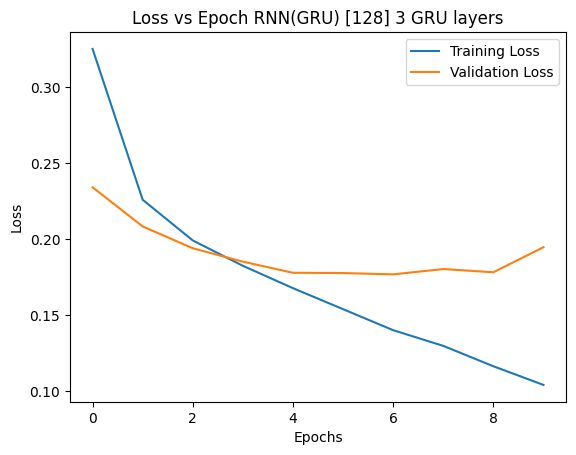

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 178s 137ms/step - accuracy: 0.8170 - loss: 0.4136 - val_accuracy: 0.9046 - val_loss: 0.2279
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 136ms/step - accuracy: 0.9025 - loss: 0.2328 - val_accuracy: 0.9141 - val_loss: 0.2111
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 136ms/step - accuracy: 0.9170 - loss: 0.2002 - val_accuracy: 0.9226 - val_loss: 0.1933
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 136ms/step - accuracy: 0.9250 - loss: 0.1851 - val_accuracy: 0.9242 - val_loss: 0.1873
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 136ms/step - accuracy: 0.9333 - loss: 0.1665 - val_accuracy: 0.9261 - val_loss: 0.1798
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 170s 136ms/step - accuracy: 0.9383 - loss: 0.1532 - val_accuracy: 0.9288 - val_loss: 0.1773
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 136ms/step - accuracy: 0.9430 - loss: 0.1424 - val_accuracy: 0.9323 - val_loss: 0.1843
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - ac

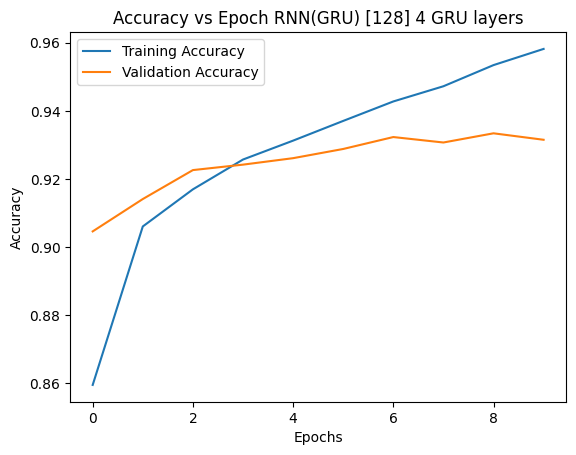

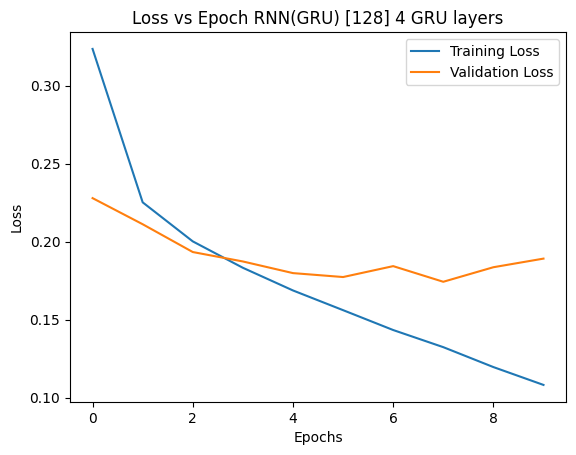

In [42]:
model1.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])


history = model1.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model1.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')



plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(GRU) [128] 2 GRU layers')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(GRU) [128] 2 GRU layers')

plt.legend()

plt.show()

model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])



history = model2.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model2.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')



plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(GRU) [128] 3 GRU layers')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(GRU) [128] 3 GRU layers')

plt.legend()

plt.show()



model3.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])



history = model3.fit(

            X_train_padded,

            y_train_onehot,

            validation_data=(X_val_padded, y_val_onehot),

            epochs=10,

            batch_size=64,

            callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]

          )



loss, accuracy = model3.evaluate(X_test_padded, y_test_onehot)

print(f'Test Loss: {loss:.4f}')

print(f'Test Accuracy: {accuracy:.4f}')



plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy vs Epoch RNN(GRU) [128] 4 GRU layers')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss vs Epoch RNN(GRU) [128] 4 GRU layers')

plt.legend()

plt.show()




Clearly GRU with 2 layers performs better than the rest

## **Question 06**

For the best model above, try Dropout: 0.1 and any other regularization parameters.

In [47]:
def train_model(
    rate
):
    model = Sequential()

    model.add(embedding_layer)
    
    model.add(GRU(best_unit,activation='relu',return_sequences=True))
    
    model.add(Dropout(rate=rate))
    
    model.add(GRU(best_unit,activation='relu'))
    
    model.add(Dropout(rate=rate))
    
    model.add(Dense(2,activation='softmax'))
    
    model.summary()
    
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])
    
    
    history = model.fit(
    
                X_train_padded,
    
                y_train_onehot,
    
                validation_data=(X_val_padded, y_val_onehot),
    
                epochs=10,
    
                batch_size=64,
    
                callbacks=[EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)]
    
              )
    
    
    
    loss, accuracy = model.evaluate(X_test_padded, y_test_onehot)
    
    print(f'Test Loss: {loss:.4f}')
    
    print(f'Test Accuracy: {accuracy:.4f}')
    
    
    
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    plt.xlabel('Epochs')
    
    plt.ylabel('Accuracy')
    
    plt.title(f'Accuracy vs Epoch RNN(GRU) [128] 2 GRU layers Dropout Rate={rate}')
    
    plt.legend()
    
    plt.show()
    
    
    
    plt.plot(history.history['loss'], label='Training Loss')
    
    plt.plot(history.history['val_loss'], label='Validation Loss')
    
    plt.xlabel('Epochs')
    
    plt.ylabel('Loss')
    
    plt.title(f'Loss vs Epoch RNN(GRU) [128] 2 GRU layers Dropout Rate={rate}')
    
    plt.legend()
    
    plt.show()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_60 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_61 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.8273 - loss: 0.4018 - val_accuracy: 0.8957 - val_loss: 0.2482
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9038 - loss: 0.2334 - val_accuracy: 0.9159 - val_loss: 0.2064
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9168 - loss: 0.2045 - val_accuracy: 0.9238 - val_loss: 0.1912
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9247 - loss: 0.1857 - val_accuracy: 0.9167 - val_loss: 0.2015
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9308 - loss: 0.1707 - val_accuracy: 0.9265 - val_loss: 0.1848
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9370 - loss: 0.1579 - val_accuracy: 0.9262 - val_loss: 0.1852
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9436 - loss: 0.1428 - val_accuracy: 0.9233 - val_loss: 0.1937
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9483 -

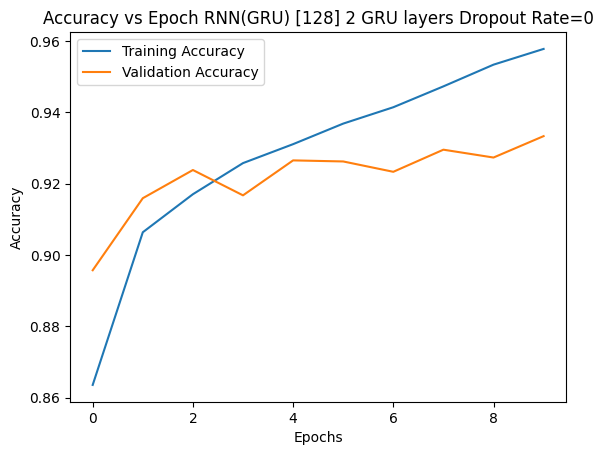

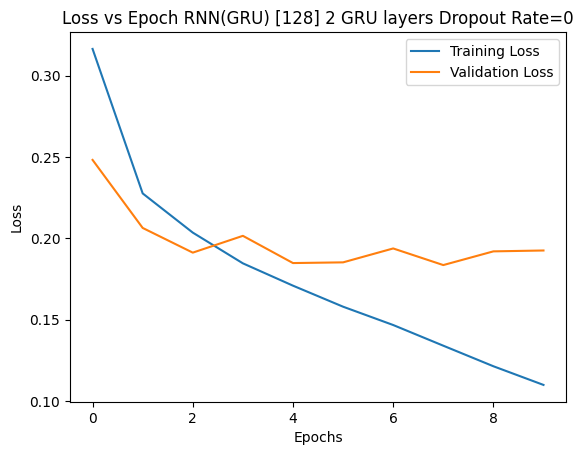

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_62 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_63 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.8107 - loss: 0.4250 - val_accuracy: 0.8964 - val_loss: 0.2447
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9039 - loss: 0.2379 - val_accuracy: 0.9154 - val_loss: 0.2119
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9164 - loss: 0.2062 - val_accuracy: 0.9198 - val_loss: 0.2050
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9216 - loss: 0.1935 - val_accuracy: 0.9199 - val_loss: 0.1999
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9302 - loss: 0.1747 - val_accuracy: 0.9263 - val_loss: 0.1849
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9344 - loss: 0.1641 - val_accuracy: 0.9295 - val_loss: 0.1802
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9390 - loss: 0.1550 - val_accuracy: 0.9312 - val_loss: 0.1825
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9438 -

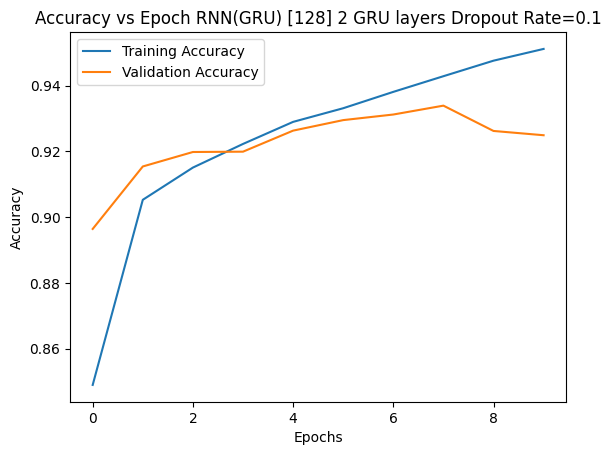

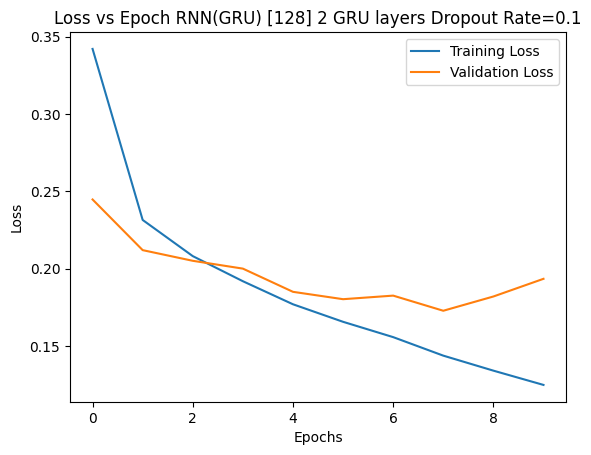

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_64 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_65 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 94s 70ms/step - accuracy: 0.8121 - loss: 0.4303 - val_accuracy: 0.9028 - val_loss: 0.2448
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.9017 - loss: 0.2406 - val_accuracy: 0.9140 - val_loss: 0.2159
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 68ms/step - accuracy: 0.9144 - loss: 0.2141 - val_accuracy: 0.9199 - val_loss: 0.2035
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9194 - loss: 0.1993 - val_accuracy: 0.9240 - val_loss: 0.1931
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9268 - loss: 0.1816 - val_accuracy: 0.9268 - val_loss: 0.1821
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9300 - loss: 0.1725 - val_accuracy: 0.9304 - val_loss: 0.1787
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9387 - loss: 0.1577 - val_accuracy: 0.9283 - val_loss: 0.1814
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9403 -

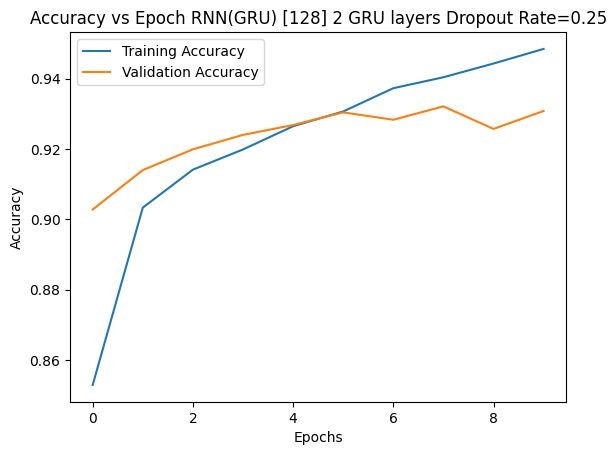

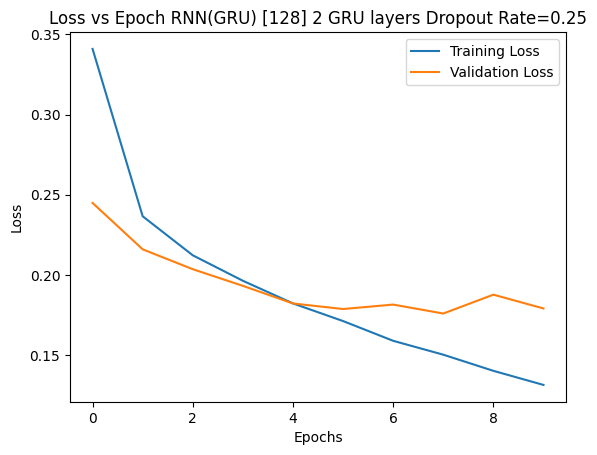

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_66 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_67 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 69ms/step - accuracy: 0.7961 - loss: 0.4558 - val_accuracy: 0.8998 - val_loss: 0.2441
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.8965 - loss: 0.2533 - val_accuracy: 0.9114 - val_loss: 0.2197
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9087 - loss: 0.2246 - val_accuracy: 0.9208 - val_loss: 0.1997
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9189 - loss: 0.2007 - val_accuracy: 0.9244 - val_loss: 0.1937
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9266 - loss: 0.1855 - val_accuracy: 0.9221 - val_loss: 0.1974
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9303 - loss: 0.1716 - val_accuracy: 0.9308 - val_loss: 0.1803
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9339 - loss: 0.1641 - val_accuracy: 0.9255 - val_loss: 0.1958
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9374 -

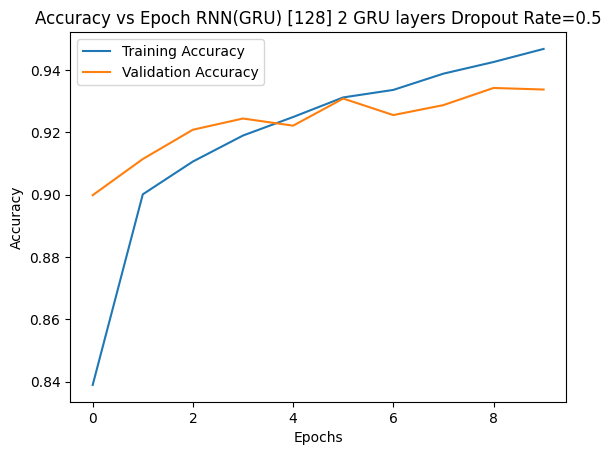

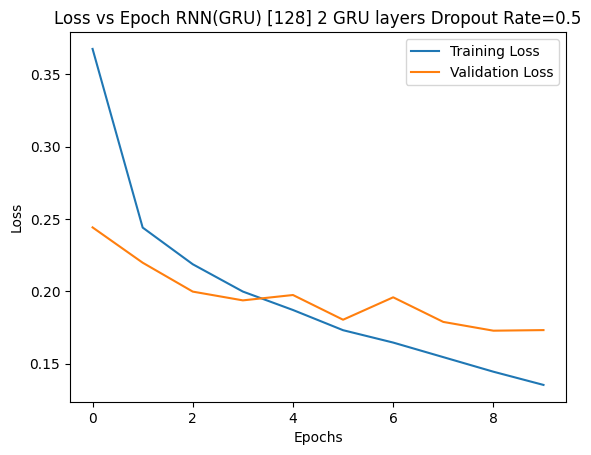

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_68 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_69 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 68ms/step - accuracy: 0.7827 - loss: 0.4974 - val_accuracy: 0.8914 - val_loss: 0.2626
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.8894 - loss: 0.2673 - val_accuracy: 0.9051 - val_loss: 0.2367
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.9034 - loss: 0.2372 - val_accuracy: 0.9159 - val_loss: 0.2129
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9108 - loss: 0.2205 - val_accuracy: 0.9244 - val_loss: 0.2001
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.9199 - loss: 0.2015 - val_accuracy: 0.9242 - val_loss: 0.2155
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9236 - loss: 0.1882 - val_accuracy: 0.9247 - val_loss: 0.1931
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9269 - loss: 0.1822 - val_accuracy: 0.9282 - val_loss: 0.1837
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9325 -

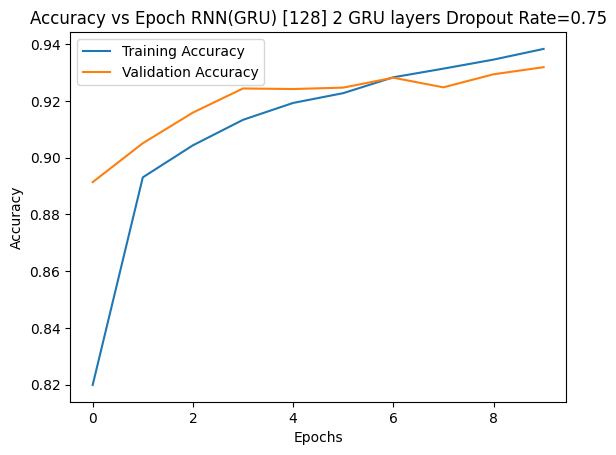

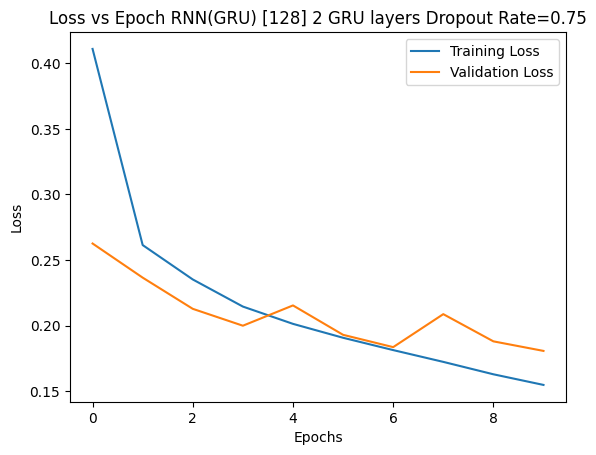

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 300, 100)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_70 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_71 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.7573 - loss: 0.5597 - val_accuracy: 0.8712 - val_loss: 0.3234
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.8668 - loss: 0.3290 - val_accuracy: 0.8906 - val_loss: 0.2770
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.8894 - loss: 0.2777 - val_accuracy: 0.8830 - val_loss: 0.2571
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.8996 - loss: 0.2538 - val_accuracy: 0.8983 - val_loss: 0.2522
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9070 - loss: 0.2358 - val_accuracy: 0.9160 - val_loss: 0.2385
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9132 - loss: 0.2254 - val_accuracy: 0.8995 - val_loss: 0.2350
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.9194 - loss: 0.2104 - val_accuracy: 0.9008 - val_loss: 0.2262
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.9199 -

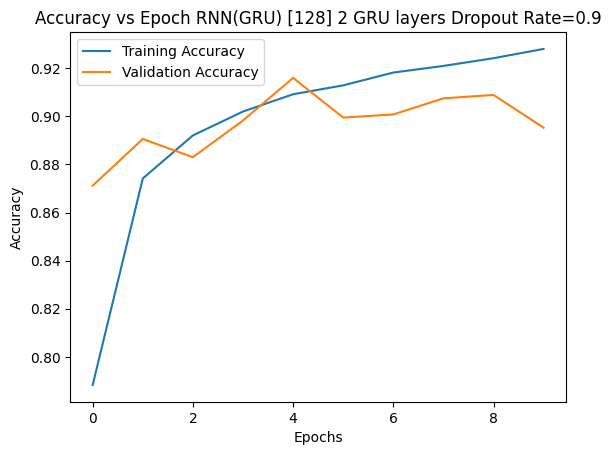

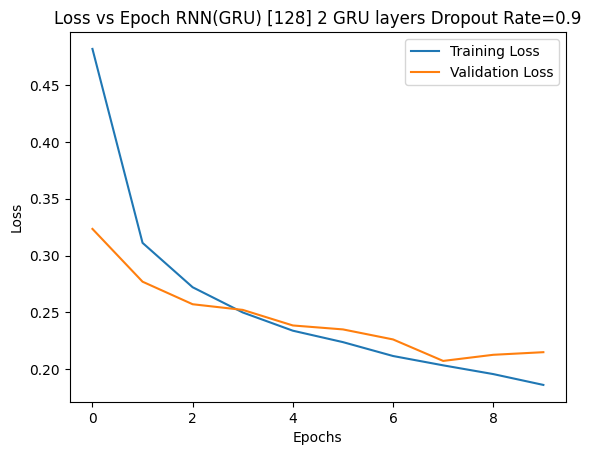

In [48]:
dropout_rates = [0,0.1,0.25,0.5,0.75,0.9]

for rate in dropout_rates:
    train_model(rate)

Dropout Rate 0.5 performs better than others